In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_explore = pd.read_csv("../data/heart_train.csv")
data_explore.sample(10)

,Unnamed: 0,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
274,895,57,M,ASY,110,335,0,Normal,143,Y,3.0,Flat,1
537,80,55,M,NAP,110,277,0,Normal,160,N,0.0,Up,0
32,453,60,M,ASY,120,0,0,Normal,133,Y,2.0,Up,0
335,610,54,F,ASY,127,333,1,ST,154,N,0.0,Flat,1
421,347,48,M,ASY,115,0,1,Normal,128,N,0.0,Flat,1
234,407,62,M,ASY,115,0,1,Normal,72,Y,-0.5,Flat,1
181,116,38,M,ASY,120,282,0,Normal,170,N,0.0,Flat,1
324,740,54,F,NAP,160,201,0,Normal,163,N,0.0,Up,0
487,674,62,M,ATA,120,281,0,LVH,103,N,1.4,Flat,1
283,437,64,M,ASY,120,0,1,ST,106,N,2.0,Flat,1


In [3]:
data_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      615 non-null    int64  
 1   Age             615 non-null    int64  
 2   Sex             615 non-null    object 
 3   ChestPainType   615 non-null    object 
 4   RestingBP       615 non-null    int64  
 5   Cholesterol     615 non-null    int64  
 6   FastingBS       615 non-null    int64  
 7   RestingECG      615 non-null    object 
 8   MaxHR           615 non-null    int64  
 9   ExerciseAngina  615 non-null    object 
 10  Oldpeak         615 non-null    float64
 11  ST_Slope        615 non-null    object 
 12  HeartDisease    615 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 62.6+ KB


In [5]:
data_explore.duplicated().sum()

0

## Heart Disease

<Axes: xlabel='HeartDisease', ylabel='count'>

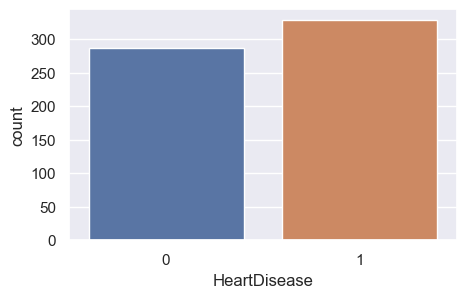

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
sns.countplot(data=data_explore, x='HeartDisease', ax=ax)

## Age

<Axes: xlabel='Age', ylabel='Count'>

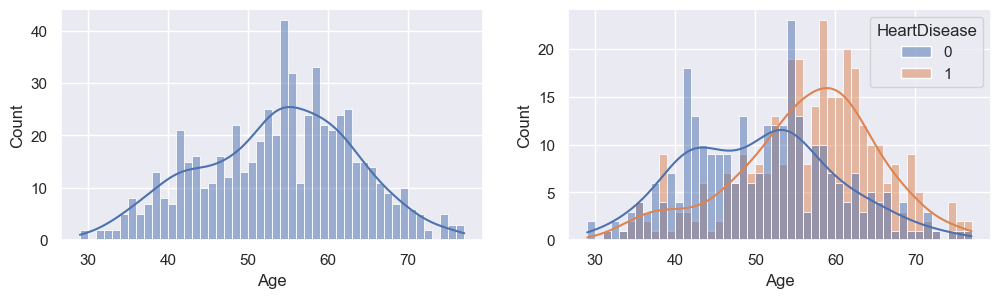

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12,3))
sns.histplot(data=data_explore, x='Age', binwidth=1, kde=True, ax=ax[0])
sns.histplot(data=data_explore, x='Age', hue='HeartDisease', binwidth=1, kde=True, ax=ax[1])

<Axes: xlabel='Age', ylabel='Count'>

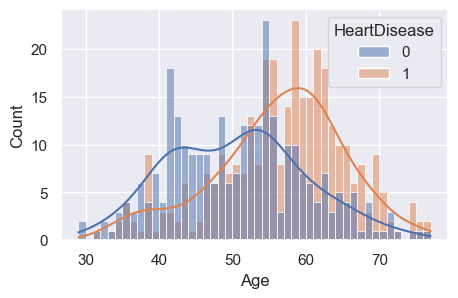

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
sns.histplot(data=data_explore, x='Age', hue='HeartDisease', binwidth=1, kde=True, ax=ax)

## MaxHR

I'm not sure how this feature was measured but we can see that having a high max heart rate is good. This makes sense based on my knowledge of health/fitness.

<Axes: xlabel='MaxHR', ylabel='Count'>

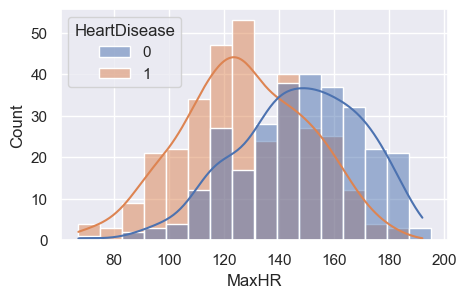

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
sns.histplot(data=data_explore, x='MaxHR', hue='HeartDisease', binwidth=8, kde=True, ax=ax)

A common max heart rate calculation is `200 - Age` but it doesn't seem like that is how these were calculated.

In [4]:
data_explore['MaxHR_Estiamte'] = 220 - data_explore['Age']
data_explore[['MaxHR_Estiamte', 'MaxHR', 'Age']].sample(10)

,MaxHR_Estiamte,MaxHR,Age
477,173,150,47
234,158,72,62
31,143,110,77
491,166,118,54
20,162,92,58
314,167,122,53
458,162,105,58
611,175,140,45
40,159,146,61
479,168,118,52


An interesting feature could be the difference between the "estimated max Heart rate" and the recorded "max heart rate". 

I would think that if the recorded max heart rate is much lower, then that indicates they are unhealthier. This is confirmed in the graph below where positive values mean the person's max heart rate is worse than what it should be and negative values mean the person's max heart rate is better than what it should be. 

In [5]:
data_explore['MaxHR_Estiamte_Diff'] = data_explore['MaxHR_Estiamte'] - data_explore['MaxHR']

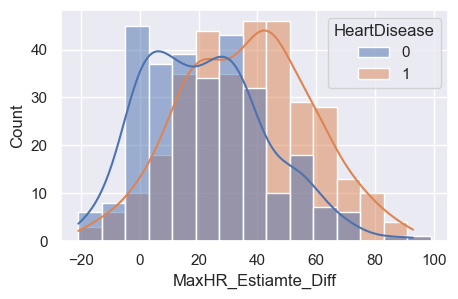

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
sns.histplot(data=data_explore, x='MaxHR_Estiamte_Diff', hue='HeartDisease', binwidth=8, kde=True, ax=ax)

## Sex

<Axes: xlabel='Sex', ylabel='count'>

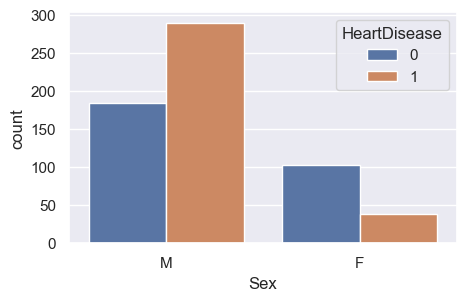

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
sns.countplot(data=data_explore, x='Sex', hue='HeartDisease', ax=ax)

## ChestPainType

Note: Angina is chest pain due to reduced oxygen-rich blood flow to the heart. This commonly occurs during physical activity or emotional distress.  

- TA: Typical Angina is when the angina presents certain characteristics like pressure and tightness in the chest.
- ATA: Atypical Angina is when the agina does not present these common characteristics. Maybe the patient feels burning or stabbing. 
- NAP: Non-Anginal Pain is when there is chest pain that is not due to reduced blood flow to the heart. It's commonly NOT related to physical activity. 
- ASY: Asymptomatic in this case means they are not experiencing any chest pain. 

<Axes: xlabel='ChestPainType', ylabel='count'>

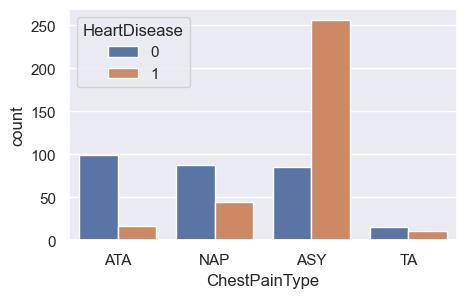

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
sns.countplot(data=data_explore, x='ChestPainType', hue='HeartDisease', ax=ax)

## ExerciseAngina

<Axes: xlabel='ExerciseAngina', ylabel='count'>

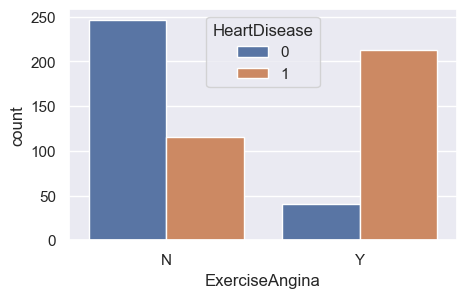

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
sns.countplot(data=data_explore, x='ExerciseAngina', hue='HeartDisease', ax=ax)

## RestingBP (Blood Pressure)

Blood Pressures is how much pressure your blood applies to the walls of your blood vessels.  

There are two types of blood pressure: 
- Systolic - the amount of pressure when your heart pumps
- Diastolic - the amount of pressure when your heart is at rest

The name of this feature indicates we are looking at diastolic blood pressure (resting blood pressure). 

This feature is measured in mmHG

In [9]:
sum(data_explore['RestingBP'] < 50)

1

<Axes: xlabel='RestingBP', ylabel='Count'>

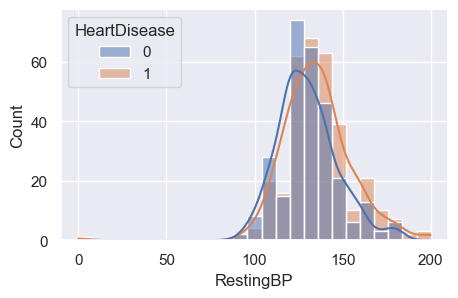

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
sns.histplot(data=data_explore, x='RestingBP', hue='HeartDisease', binwidth=8, kde=True, ax=ax)

### Cholesterol
This is a measure of "serum cholesterol". 

Serum cholesterol represents the total amount of cholesterol in your blood. It's a combination of LDL and HDL cholesterol.  

In [14]:
sum(data_explore['Cholesterol'] == 0)

106

There are likely 106 missing values, so let's remove those in the below graph.

<Axes: xlabel='Cholesterol', ylabel='Count'>

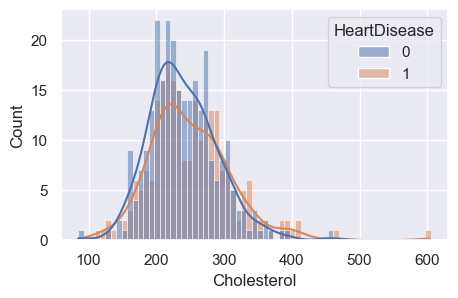

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
sns.histplot(data=data_explore[data_explore['Cholesterol'] != 0], x='Cholesterol', hue='HeartDisease', binwidth=8, kde=True, ax=ax)

### FastingBS (Blood Sugar)

- 1: if FastingBS > 120 mg/dl
- 0: otherwise

<Axes: xlabel='FastingBS', ylabel='count'>

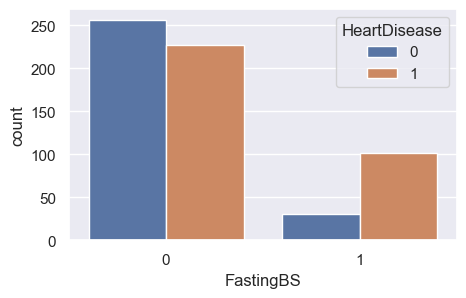

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
sns.countplot(data=data_explore, x='FastingBS', hue='HeartDisease', ax=ax)

### RestingECG (Electrocardiogram)
- Normal: Normal
- ST: having ST Segment and/or T Wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria



##### Healthy ST-Segment and T-Wave  
This images show what these should normally look like.  
<img src="images/ST-Segment.png" alt="ST-Segment.png" width="250"/>
<img src="images/T-Wave.png" alt="T-Wave.png" width="250"/>  

**Abnormal ST-Segment**  
<img src="images/ST-Segment-Abnormal.png" alt="ST-Segment-Abnormal.png" width="500"/>  

**Abnormal T-Wave**  
<img src="images/T-Wave-Abnormal.png" alt="T-Wave-Abnormal" width="500"/>  

*All Pictures taken from here: https://app.pulsenotes.com/clinical/ecgs/notes/8-st-segment-t-waves*

<Axes: xlabel='RestingECG', ylabel='count'>

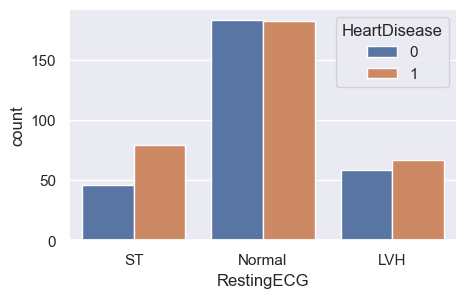

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
sns.countplot(data=data_explore, x='RestingECG', hue='HeartDisease', ax=ax)

## Oldpeak

oldpeak = ST [Numeric value measured in depression]

There are a lot of 0 values. I'm not sure if that is missing data or if it represents the peak is not depressed at all. But since the values go to many decimal places, I'm going to assume an exact value of 0.0000000 means missing data.

In [11]:
sum(data_explore['Oldpeak'] == 0)

253

In [18]:
data_explore['Oldpeak'].describe()

count    615.000000
mean       0.917724
std        1.110827
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

<Axes: xlabel='Oldpeak', ylabel='Count'>

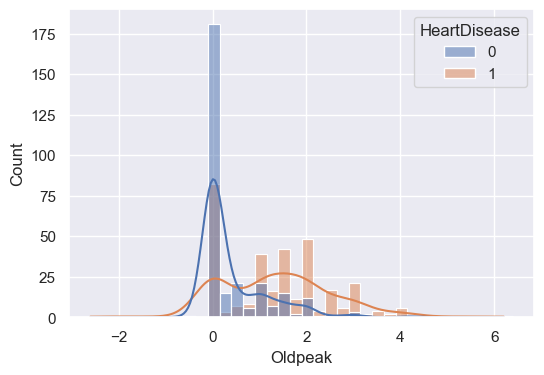

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
sns.histplot(data=data_explore, x='Oldpeak', hue='HeartDisease', binwidth=0.25, kde=True, ax=ax)

<Axes: xlabel='Oldpeak', ylabel='Count'>

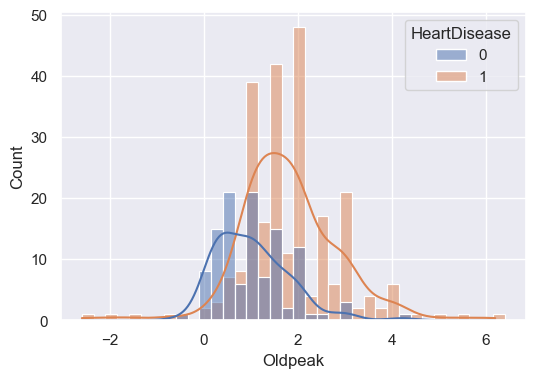

In [12]:
# Remove missing data
fig, ax = plt.subplots(1, 1, figsize=(6,4))
sns.histplot(data=data_explore[data_explore['Oldpeak'] != 0], x='Oldpeak', hue='HeartDisease', binwidth=0.25, kde=True, ax=ax)

### ST_Slope
the slope of the peak exercise ST segment 
- Up: upsloping
- Flat: flat, Down: downsloping

<Axes: xlabel='ST_Slope', ylabel='count'>

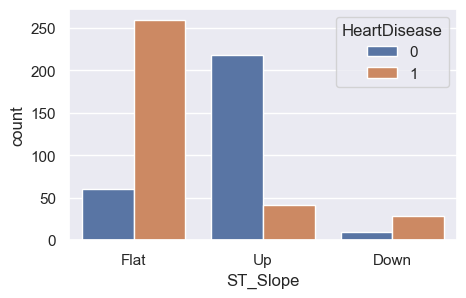

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
sns.countplot(data=data_explore, x='ST_Slope', hue='HeartDisease', ax=ax)